##### Maestría Inteligencia de Negocios y Análisis de Datos
##### Curso: Statistical Learning I
##### Alumno: 22008375- Leonel Eduardo Contreras
##### Alumno: 22008067- Luis Pedro Perez
##### Sección L

## Proyecto Final-Analisis

#### 1. Importar librerias

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler


#### 2. Cargar Dataset

In [54]:
dataset=pd.read_csv('airline_satisfaction.csv')

#### 3. Exploración de Datos

In [55]:
# Dataset
dataset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


In [56]:
# Forma de dataset
dataset.shape

(129880, 24)

In [57]:
# Variables del dataset
dataset.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [58]:
# Tipos de datos
dataset.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [59]:
# Tipo de Variables

def getDateColTypes (df):
    categoricas=[]
    continuas=[]
    discretas=[]

    for colName in df.columns:
        if(df[colName].dtype=='object'):
            categoricas.append(colName)
        else:
            if((df[colName].dtype=='int64')or (df[colName].dtype=='float64')or (df[colName].dtype=='uint8')):
                if (len(df[colName].unique())<=30):
                    discretas.append(colName)
                else:
                    continuas.append(colName)
    return categoricas, continuas, discretas

categoricas, continuas, discretas=getDateColTypes(dataset)

In [60]:
# Categoricas
categoricas

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [61]:
# Continuas
continuas

['id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [62]:
# Discretas
discretas

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [63]:
# Variables con Nulos
cols_Nan=[col for col in dataset.columns if(dataset[col].isnull().mean()>0)]
cols_Nan

['Arrival Delay in Minutes']

In [64]:
# Media de las variables con Nulos
dataset[cols_Nan].isnull().mean()

Arrival Delay in Minutes    0.003026
dtype: float64

In [65]:
# Tipo de dato de la varaibles con Nulos
dataset[cols_Nan].dtypes

Arrival Delay in Minutes    float64
dtype: object

#### 4. Imputación de Datos

##### a. Eliminar faltantes

In [66]:
# Eliminar del dataset los NaN
data_no_Nan=dataset.dropna()
data_no_Nan

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,Loyal Customer,28,Personal Travel,Eco Plus,447,4,4,4,...,4,5,4,4,4,5,4,2,3.0,neutral or dissatisfied
129876,129877,Male,Loyal Customer,41,Personal Travel,Eco Plus,308,3,5,3,...,2,5,5,5,5,4,2,0,0.0,neutral or dissatisfied
129877,129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied
129878,129879,Male,Loyal Customer,50,Personal Travel,Eco Plus,337,5,4,4,...,3,4,5,5,3,4,3,31,22.0,satisfied


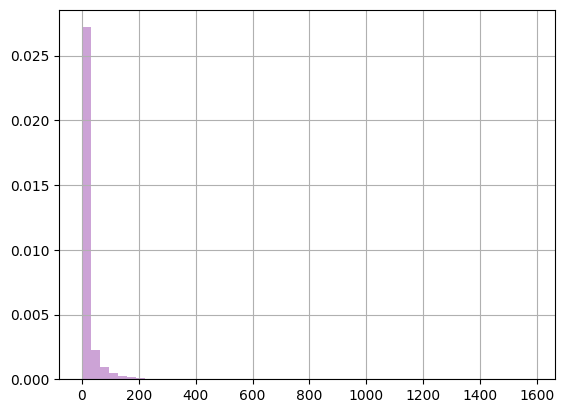

In [67]:
# Grafica para comparar la distorcion de la data original contra la data sin NAN
dataset['Arrival Delay in Minutes'].hist(bins=50,density=True,color='red',alpha=0.2)
data_no_Nan['Arrival Delay in Minutes'].hist(bins=50,density=True,color='blue',alpha=0.2)
plt.show()

##### b. Imputación Media y Mediana

In [68]:
# Obtener la Media y Mediana de la Variable Null

media=round(dataset['Arrival Delay in Minutes'].mean(),2)
mediana=round(dataset['Arrival Delay in Minutes'].median(),2)

print(f'La media de la variables es: {media} y la mediana es: {mediana}')

La media de la variables es: 15.09 y la mediana es: 0.0


In [69]:
# Se copia la data original para no afectarla con el analisis de la imputación de media y mediana
data_med=dataset.copy() 

In [70]:
# Se crean las varaibles con la imputación de media y mediana en lugar de nulos
data_med['Arrival_Delay_Mean']=data_med['Arrival Delay in Minutes'].fillna(media)
data_med['Arrival_Delay_Median']=data_med['Arrival Delay in Minutes'].fillna(mediana)

# Se despliegan las columnas para verificar si se imputaron los datos
data_med[['Arrival Delay in Minutes','Arrival_Delay_Mean','Arrival_Delay_Median']][data_med['Arrival Delay in Minutes'].isnull()]

,Arrival Delay in Minutes,Arrival_Delay_Mean,Arrival_Delay_Median
246,NaN,15.09,0.0
883,NaN,15.09,0.0
1965,NaN,15.09,0.0
2407,NaN,15.09,0.0
2448,NaN,15.09,0.0
...,...,...,...
129000,NaN,15.09,0.0
129003,NaN,15.09,0.0
129014,NaN,15.09,0.0
129015,NaN,15.09,0.0


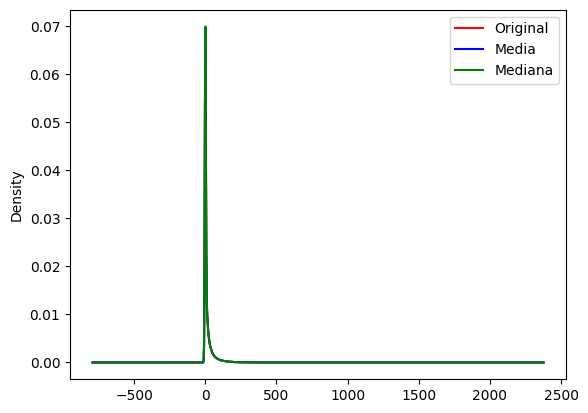

In [71]:
##Graficas para observar la distorcion entre la variable original, la imputación de media y la imputación de mediana
fig=plt.figure()
ax=fig.add_subplot(111)

data_med['Arrival Delay in Minutes'].plot.density(color='red',label='Original')
data_med['Arrival_Delay_Mean'].plot.density(color='blue',label='Media')
data_med['Arrival_Delay_Median'].plot.density(color='green',label='Mediana')
ax.legend()
plt.show()

<Axes: >

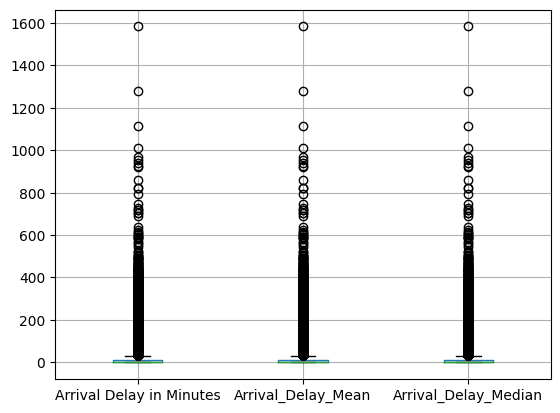

In [72]:
data_med[['Arrival Delay in Minutes','Arrival_Delay_Mean','Arrival_Delay_Median']].boxplot()

##### c. Valores arbitrarios

In [73]:
## Obtener IQR, LS y LI

IQR=dataset['Arrival Delay in Minutes'].quantile(0.75)-dataset['Arrival Delay in Minutes'].quantile(0.25) #Q3 - Q1
LI=dataset['Arrival Delay in Minutes'].quantile(0.25)-(IQR*1.75) #limite inferior
LS=dataset['Arrival Delay in Minutes'].quantile(0.75)+(IQR*1.75)# limite superior

print(f"IQR: {IQR}, LI: {LI}, LS: {LS}")

IQR: 13.0, LI: -22.75, LS: 35.75


In [74]:
# Se copia la data original para no afectarla con el analisis de la imputación de valor arbitrario
data_arb=dataset.copy() 

In [76]:
# Crear variables con extremo superior e inferior en lugar de los NaN (No se elige extremo inferior por ser negativo, sino Ceros)
data_arb['LS_Arrival_Delay']=data_arb['Arrival Delay in Minutes'].fillna(LS)
data_arb['LI_Arrival_Delay']=data_arb['Arrival Delay in Minutes'].fillna(0)

# Se despliegan las columnas para verificar si se imputaron los datos
data_arb[['Arrival Delay in Minutes','LS_Arrival_Delay','LI_Arrival_Delay']][data_arb['Arrival Delay in Minutes'].isnull()]

,Arrival Delay in Minutes,LS_Arrival_Delay,LI_Arrival_Delay
246,NaN,35.75,0.0
883,NaN,35.75,0.0
1965,NaN,35.75,0.0
2407,NaN,35.75,0.0
2448,NaN,35.75,0.0
...,...,...,...
129000,NaN,35.75,0.0
129003,NaN,35.75,0.0
129014,NaN,35.75,0.0
129015,NaN,35.75,0.0


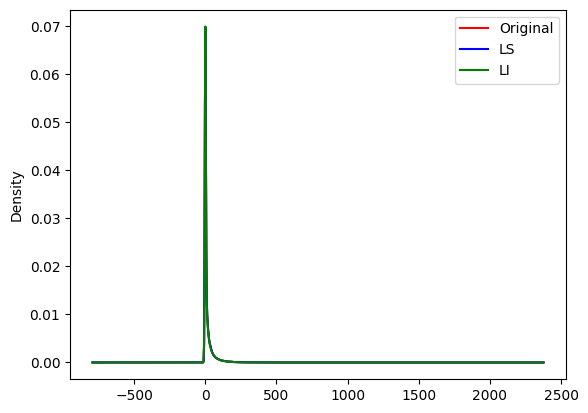

In [77]:
# Graficas para observar la distorcion entre la variable original, la imputación de LS y LI
fig=plt.figure()
ax=fig.add_subplot(111)

data_arb['Arrival Delay in Minutes'].plot.density(color='red',label='Original')
data_arb['LS_Arrival_Delay'].plot.density(color='blue',label='LS')
data_arb['LI_Arrival_Delay'].plot.density(color='green',label='LI')
ax.legend()
plt.show()

##### d. Eleccion de la imputación

In [78]:
# Se elige la media para imputar los nulos y se convierte la columna original en la columna nueva sin nulos

dataset['Arrival Delay in Minutes']=np.round(dataset['Arrival Delay in Minutes'].fillna(media),0)


#### 5. Codificación de variables categóricas

In [79]:
# Se obtienen las variables que son categoricas
categoricas

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [80]:
# Obtener de las variables categoricas sus valores y cantidad de registros

for var in categoricas:
    print("-----")
    print(dataset[var].value_counts().sort_values(ascending=False))
    

-----
Female    65899
Male      63981
Name: Gender, dtype: int64
-----
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
-----
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
-----
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
-----
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


##### a. One Hot Encoding

In [81]:
# One Hot Encoding a las variables: Gender, Customer Type y Type of Travel

ohe_gender=pd.get_dummies(dataset['Gender'],drop_first=True)
ohe_customer=pd.get_dummies(dataset['Customer Type'],drop_first=True)
ohe_travel=pd.get_dummies(dataset['Type of Travel'],drop_first=True)

dataset['Gender']=ohe_gender # Female: 0, Male: 1
dataset['Customer Type']=ohe_customer # Loyal Customer: 0, disloyal Customer: 1
dataset['Type of Travel']=ohe_travel # Business travel: 0, Personal Travel: 1

##### b. Frecuency Encoding

In [82]:
# Frecuency Encoding a la variable: Class
mapper=(dataset['Class'].value_counts().sort_values(ascending=False)).to_dict()

dataset['Class']= dataset['Class'].map(mapper) # Business:62160 ,  Eco:58309 , Eco Plus: 9411

##### c. Ordinal Encoding

In [83]:
# Ordinal encoding a la varaible target: Satisfaction
mapping={'neutral or dissatisfied':0,'satisfied':1}

dataset['satisfaction']=dataset['satisfaction'].map(mapping)


#### 6. Transformación de Variables

In [84]:
# Variables Discretas
dataset[discretas].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [85]:
# Variables Continuas
dataset[continuas].describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.090853
std,37493.270818,15.119360,997.452477,38.071126,38.407410
min,1.000000,7.000000,31.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000


In [86]:
# Buscar normalidad de las varaibles continuas de forma grafica

def plot_density_qq(dataset,col):
    '''Estafuncion muestra la grafica de densidad y el plot QQ para verificar normalidad'''
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    dataset[col].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(dataset[col],dist='norm',plot=plt)

    plt.show()

id


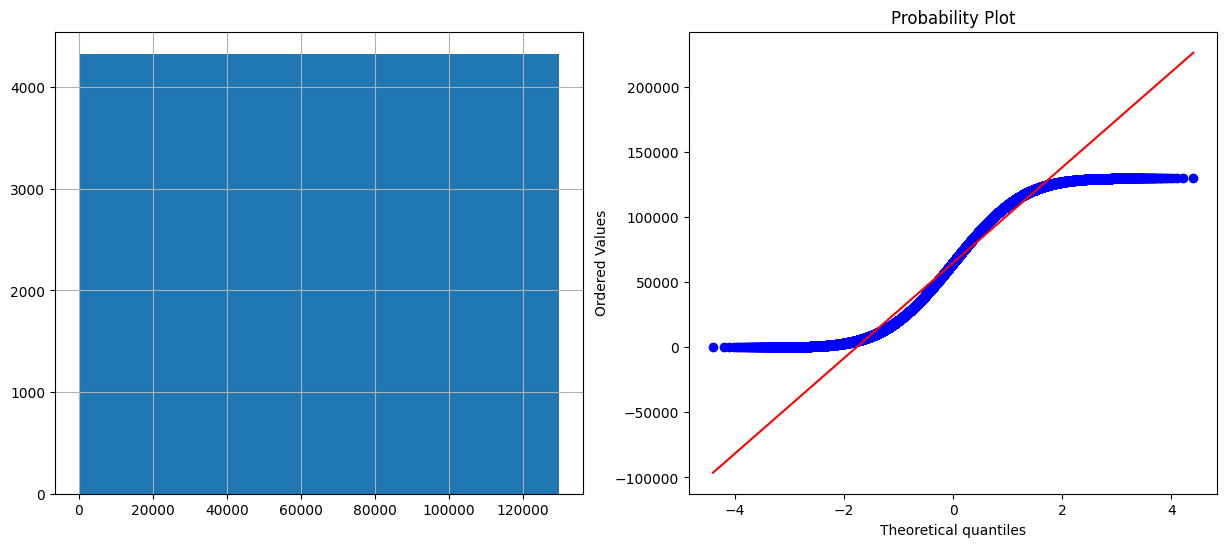

Age


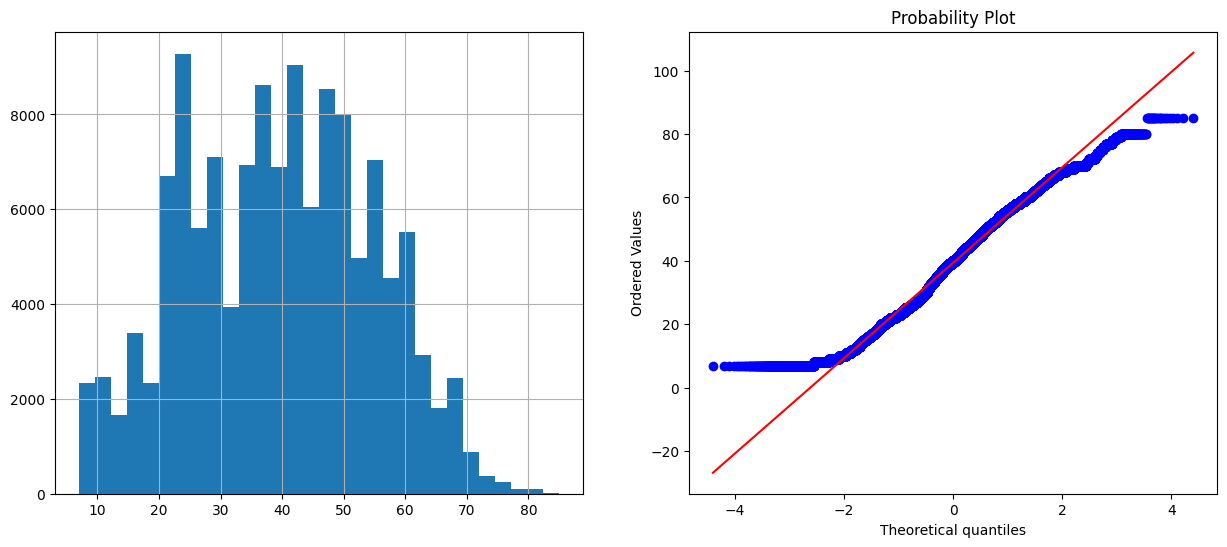

Flight Distance


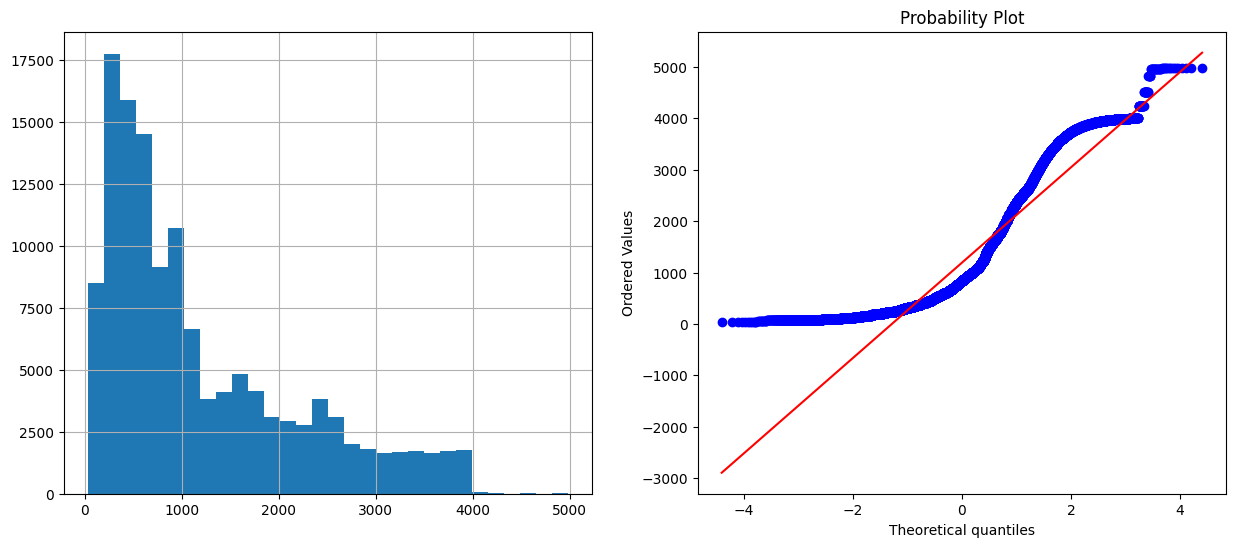

Departure Delay in Minutes


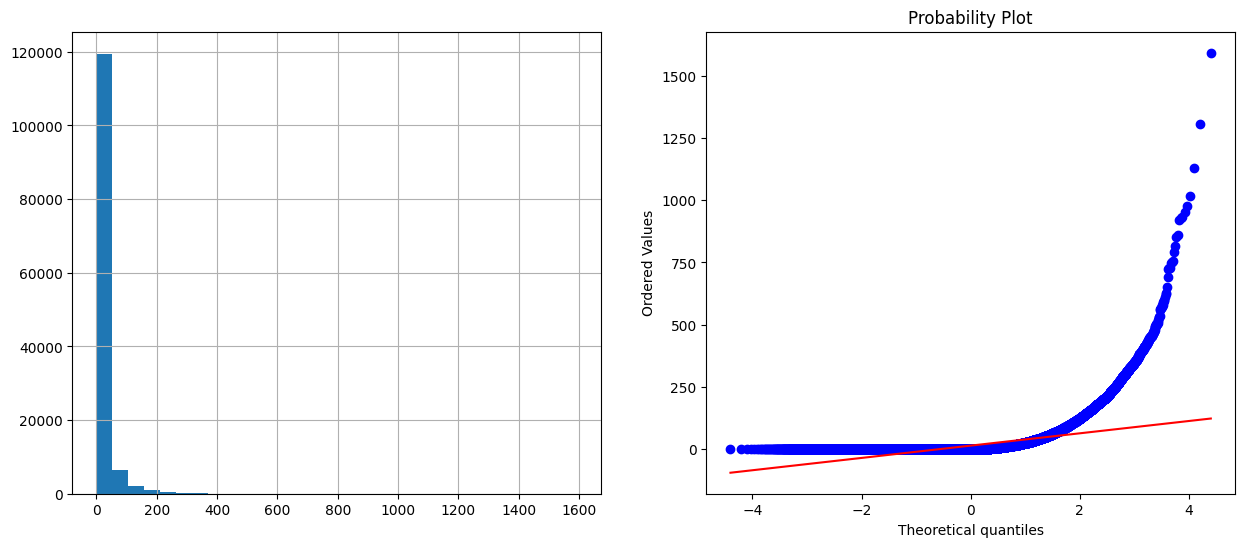

Arrival Delay in Minutes


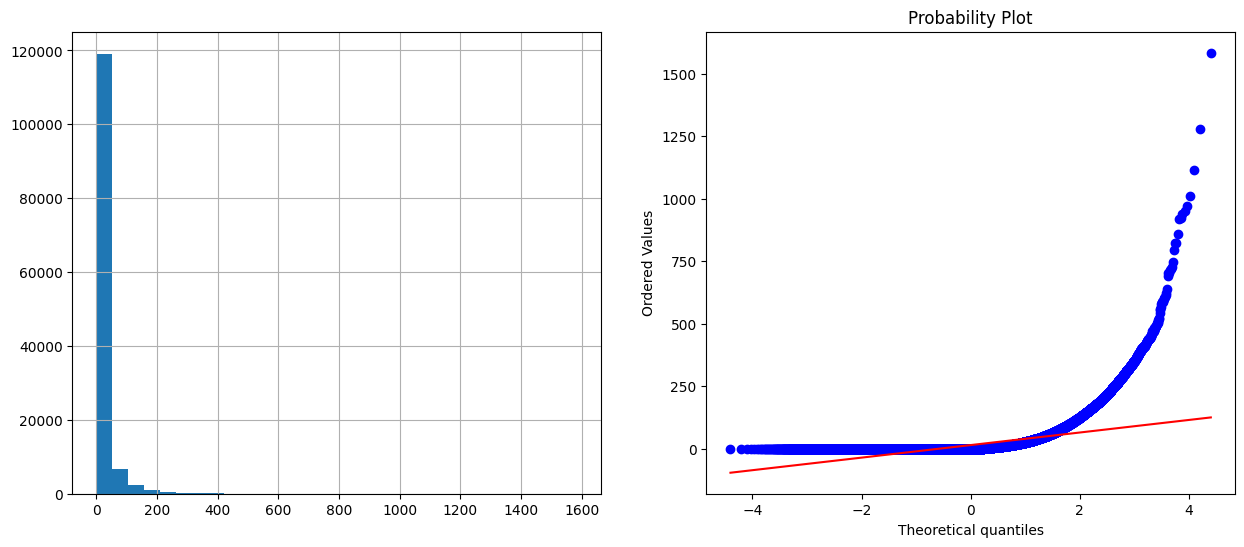

In [87]:
for col in continuas:
    print(col)
    plot_density_qq(dataset,col)

In [88]:
# Buscar la normalidad de las variables continuas con Shapiro

for col in continuas:
    shapiro_test=stats.shapiro(dataset[col])
    if (shapiro_test.pvalue<0.05):
        print(f'{col}: No es Normal ')
    else:
        print(f'{col}: Es Normal ')



id: No es Normal 
Age: No es Normal 
Flight Distance: No es Normal 
Departure Delay in Minutes: No es Normal 
Arrival Delay in Minutes: No es Normal 


c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


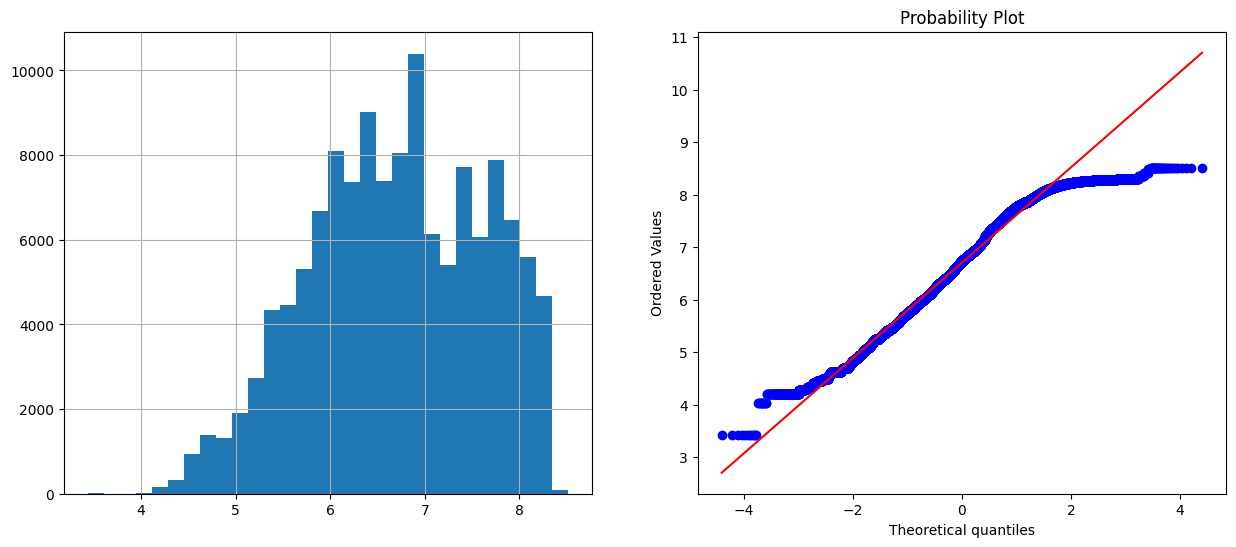

In [89]:
# Se transforma a logaritmo la variable Flight Distance
# El resto de variables no se transforma por tener ceros y media en la misma magnitud

dataset['Flight Distance']=np.log(dataset['Flight Distance'])
plot_density_qq(dataset,'Flight Distance')

#### 7. Outliers

In [90]:
def plotDistBoxQQ(dataset,col):
    '''Descripcion:Muestra las graficas de distribucion , Boxplot y Q-QPlot para detectar Outliers
        Input: dataset -> pandas dataframe , col ->string con nombre de columna
        output: visulizacion de 3 plots
        '''
    plt.figure(figsize=(20,6)) 

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("BoxPlot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_3004\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_3004\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\LEONEL\AppData\Lo

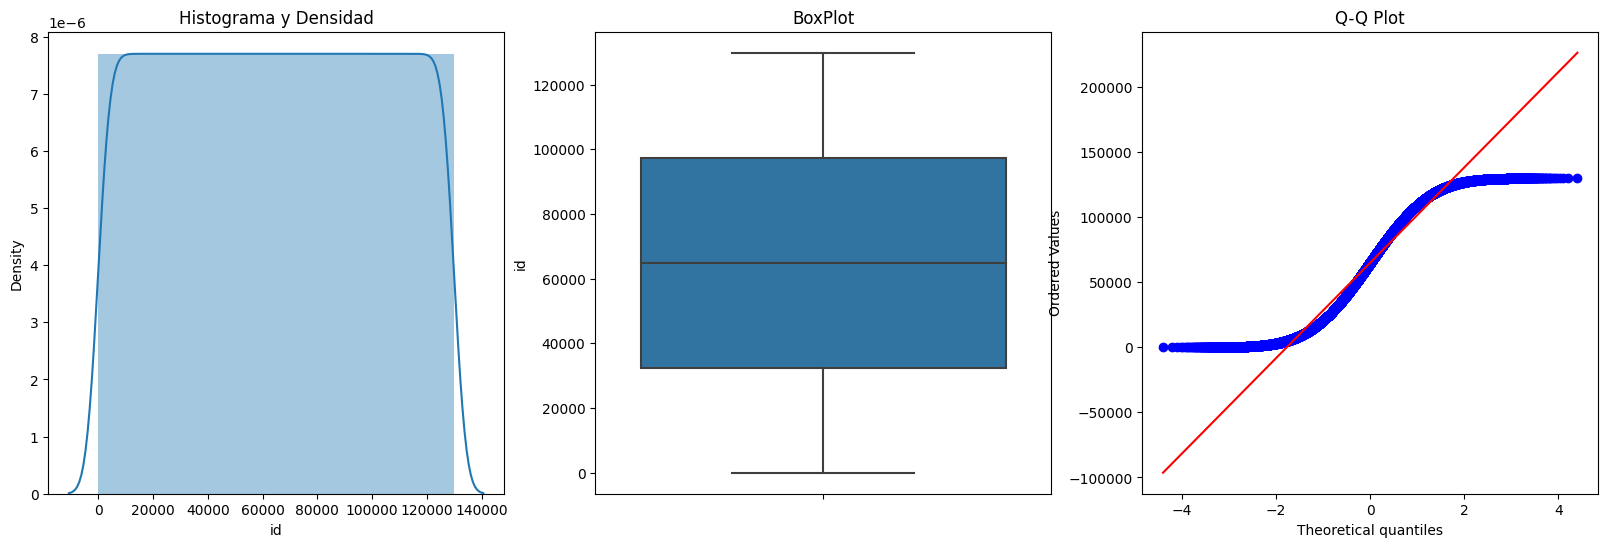

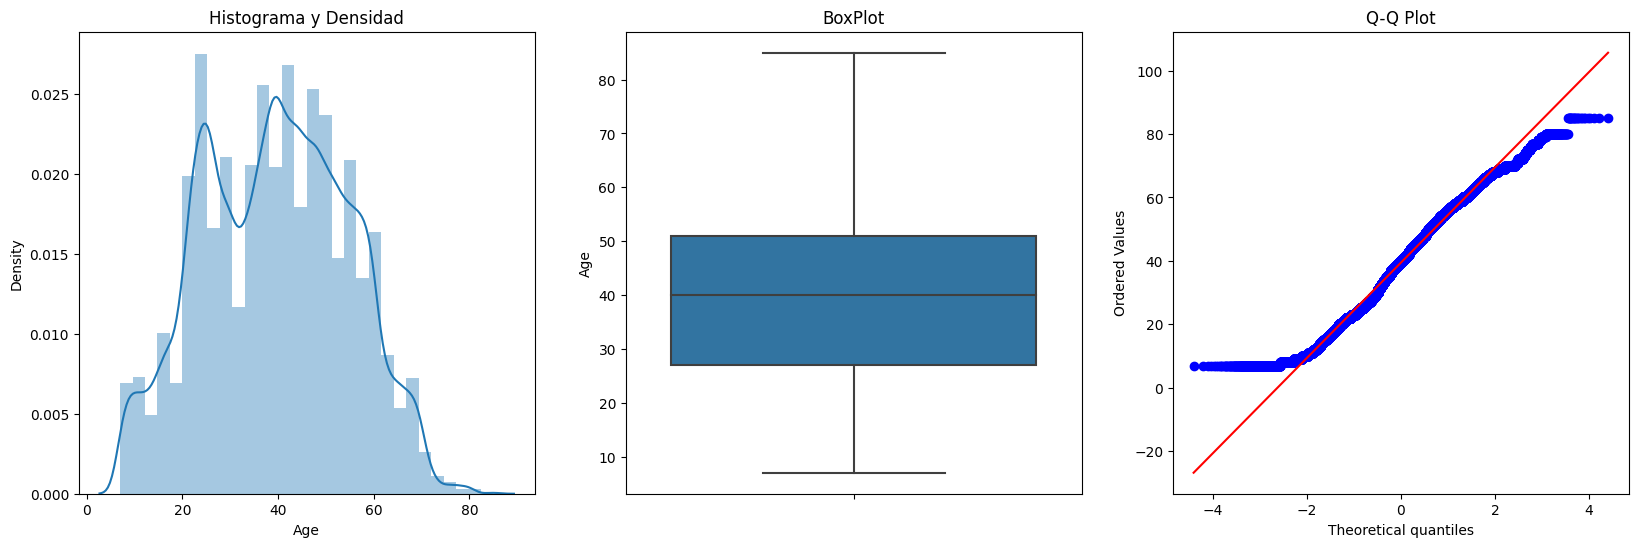

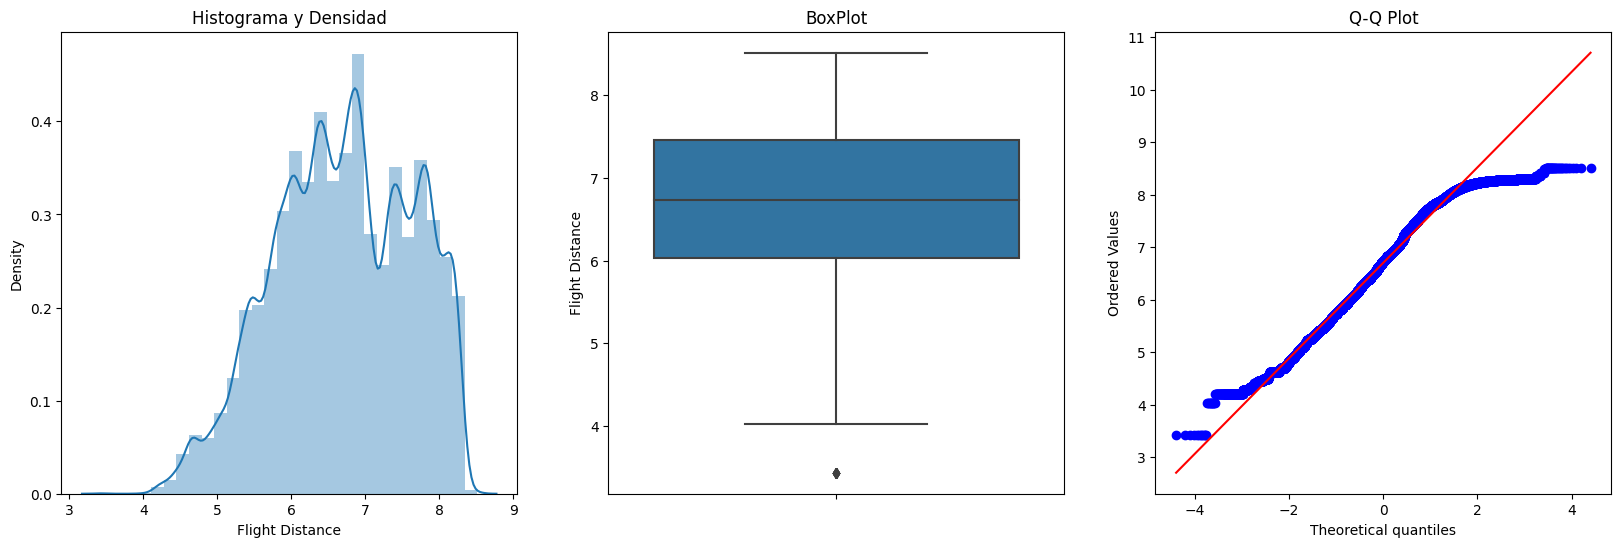

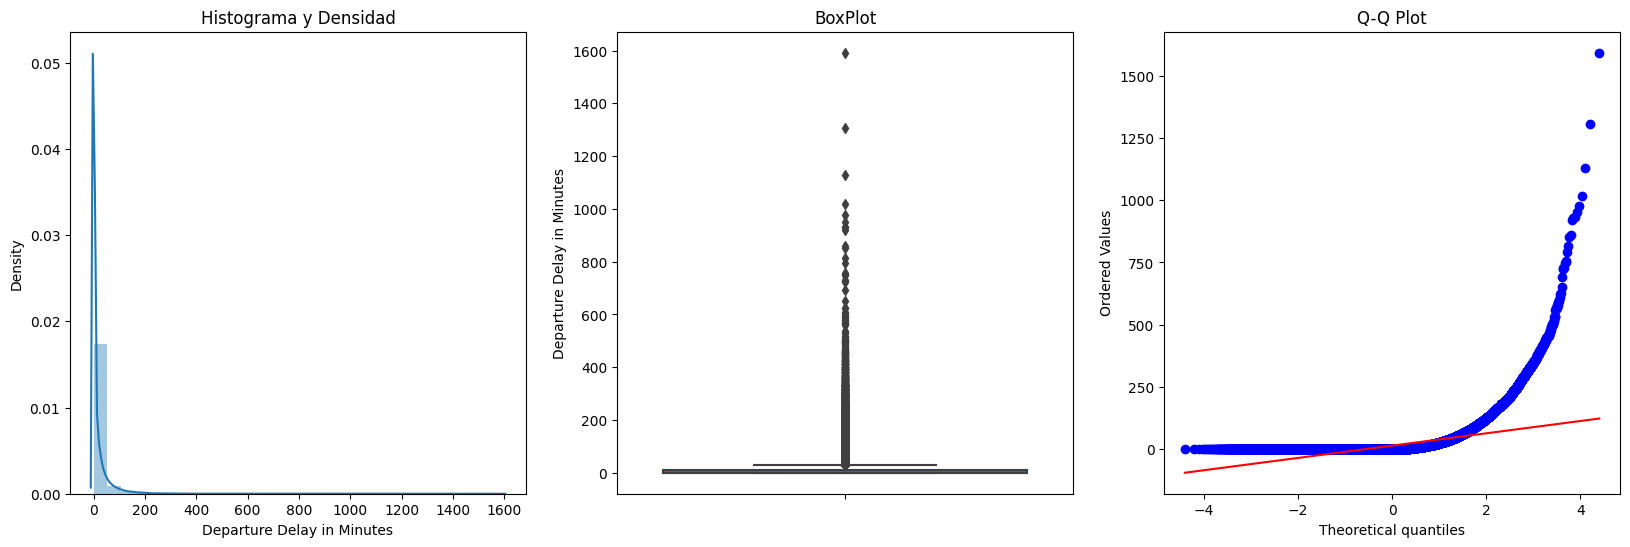

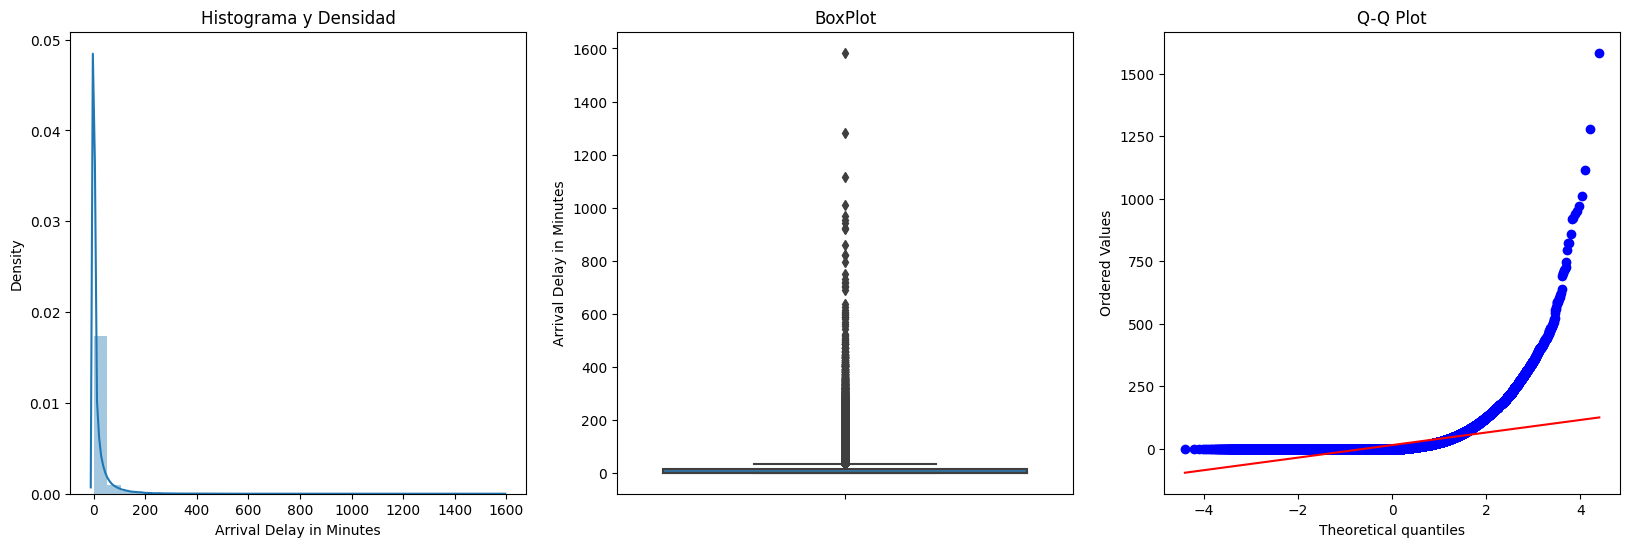

In [91]:
# Graficar para ver Outliers
for col in continuas:
    plotDistBoxQQ(dataset,col)

In [92]:
# Capping para tratamientos de Outliers

# Encontrar IQR, LI y LS de variables continuas para hacer la sustitucion

for col in continuas:
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25) #Q3 - Q1
    LI=dataset[col].quantile(0.25)-(IQR*1.75) #limite inferior
    LS=dataset[col].quantile(0.75)+(IQR*1.75)# limite superior
    if LI<0: #Evitar negativos 
        LI=0
    dataset[col]=np.where(dataset[col]>LS,LS,
                                np.where(dataset[col]<LI ,LI,dataset[col])) ##Sustituir los outliers por los limites

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_3004\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_3004\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\LEONEL\AppData\Lo

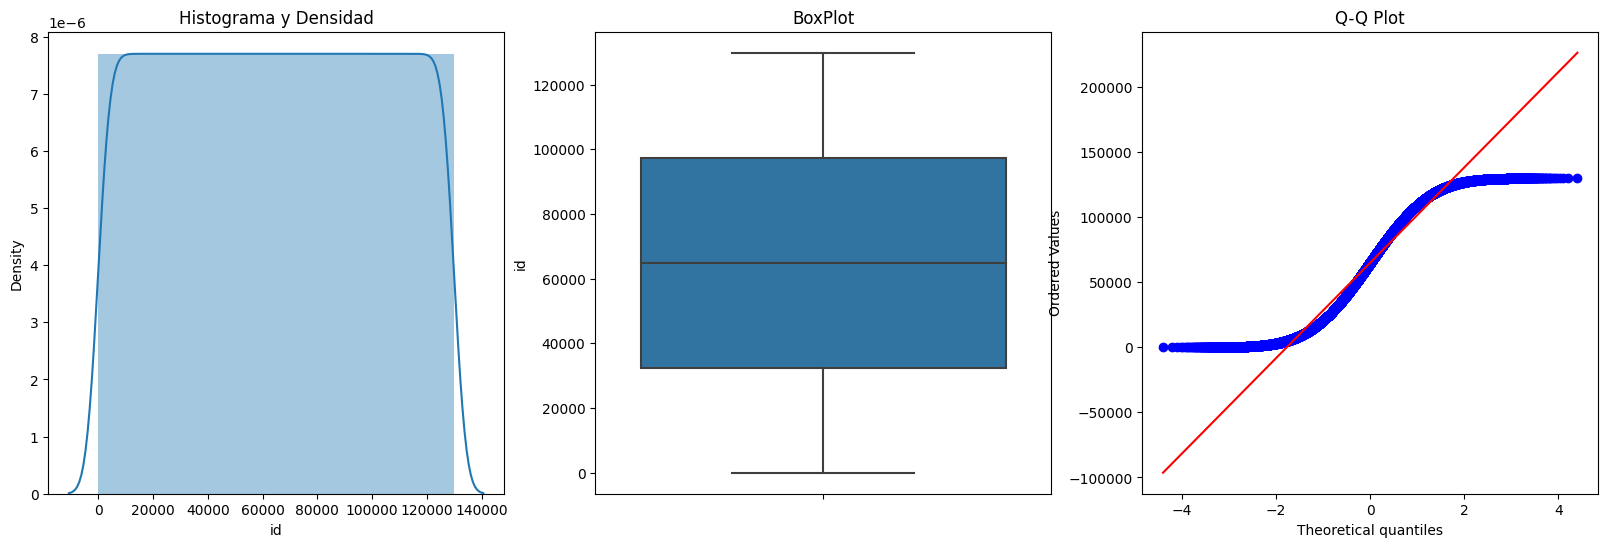

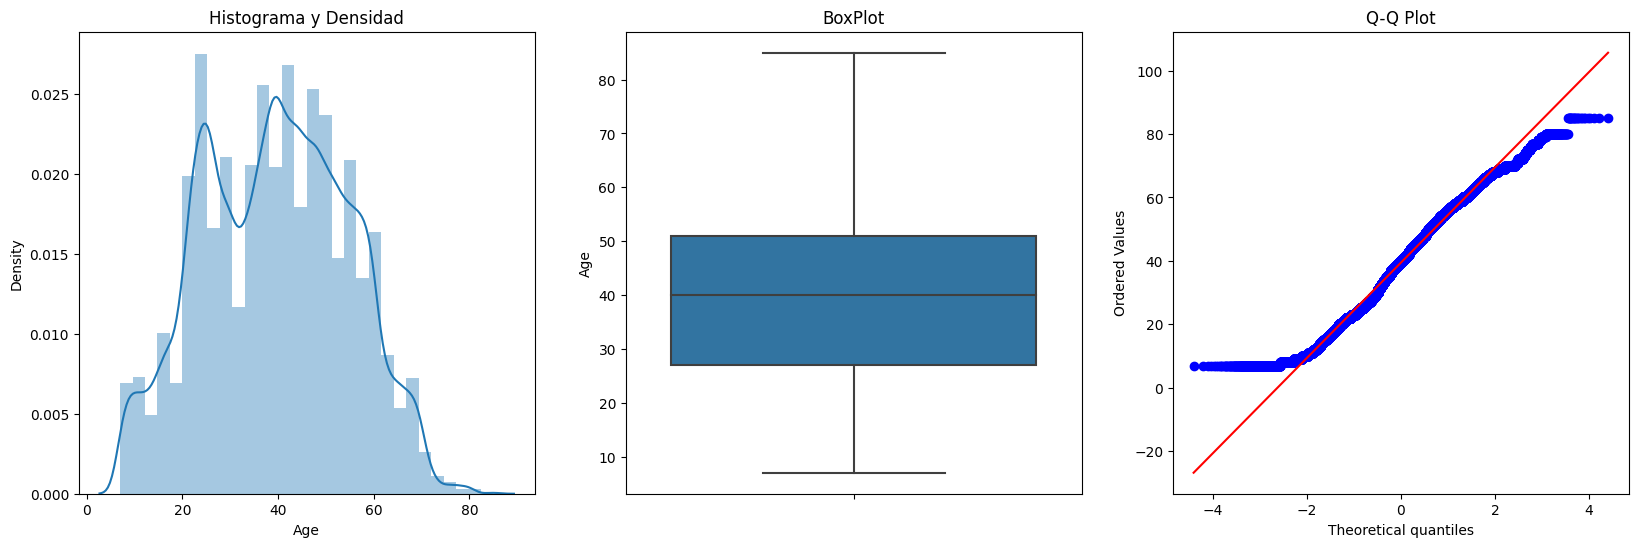

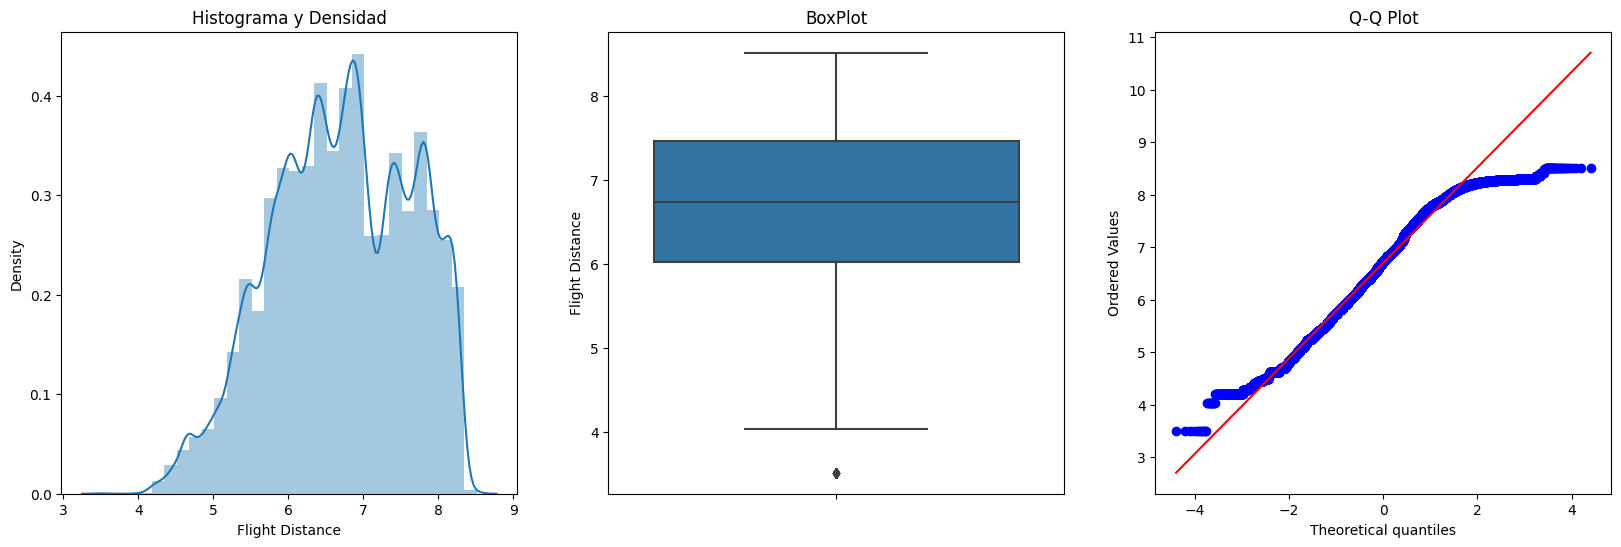

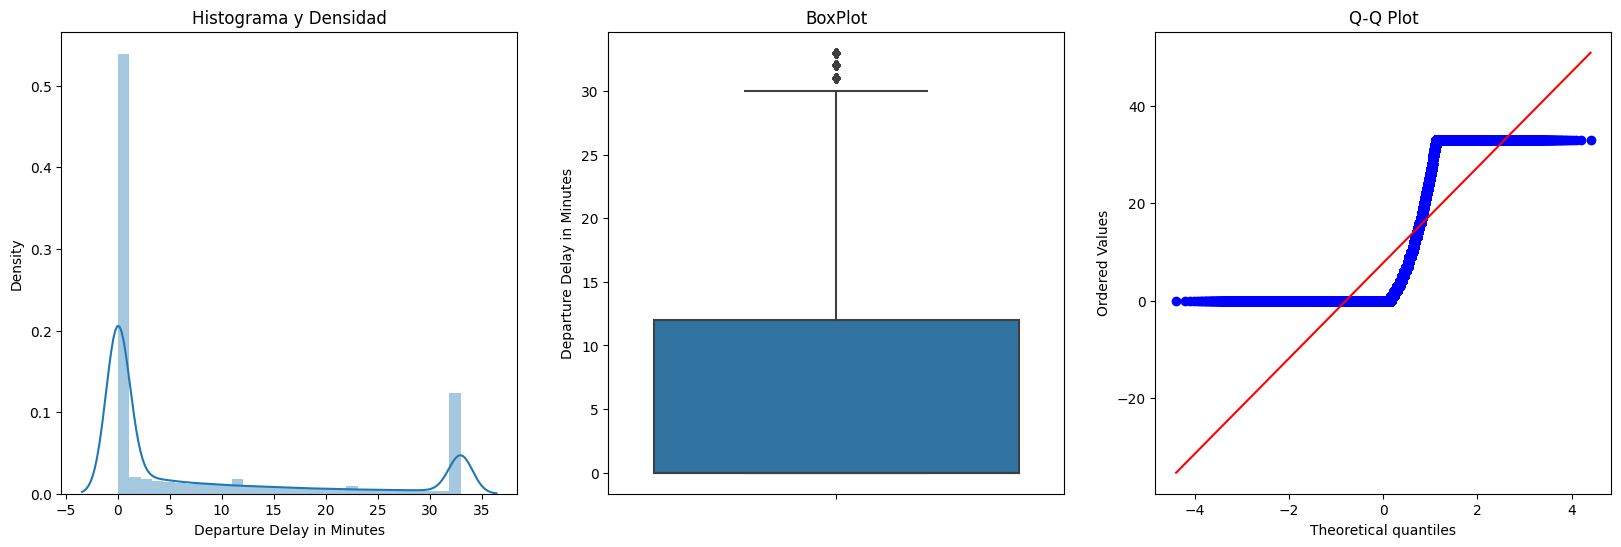

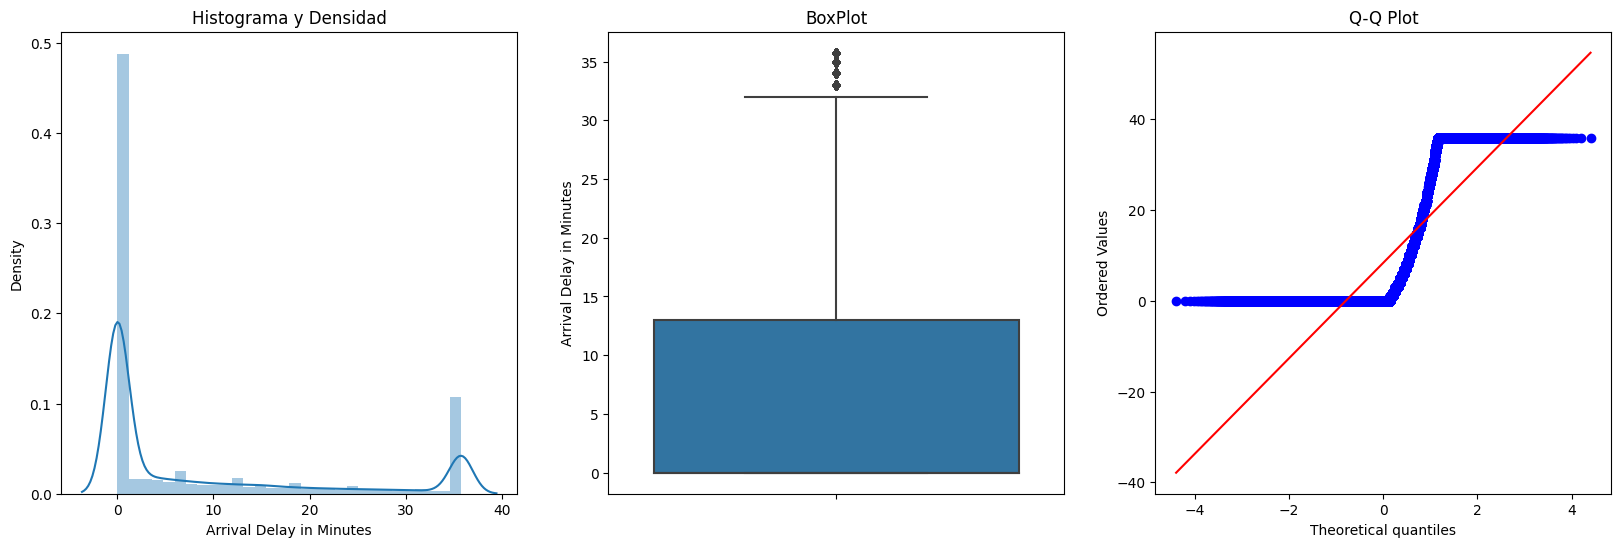

In [93]:
# Graficar para ver el cambio de Outliers
for col in continuas:
    plotDistBoxQQ(dataset,col)

#### 8. Feature Scaling

In [94]:
## Resumen de la data
dataset.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,0.492616,0.183092,39.427957,0.309416,56608.962134,6.704576,2.728696,3.057599,2.756876,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,7.787134,8.374101,0.434463
std,37493.270818,0.499947,0.386743,15.119360,0.462255,13321.406883,0.917312,1.329340,1.526741,1.401740,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,12.045058,12.846071,0.495688
min,1.000000,0.000000,0.000000,7.000000,0.000000,9411.000000,3.509242,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,0.000000,0.000000,27.000000,0.000000,58309.000000,6.025866,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,0.000000,0.000000,40.000000,0.000000,58309.000000,6.738152,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,1.000000,0.000000,51.000000,1.000000,62160.000000,7.463937,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,1.000000,85.000000,1.000000,62160.000000,8.513787,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,33.000000,35.750000,1.000000


In [95]:
# Aplicar Scaler
scaler=StandardScaler()
scaler.fit(dataset) 


data_scaled=scaler.transform(dataset)
data_scaled=pd.DataFrame(data_scaled,columns=dataset.columns)

In [96]:
## Resumen de la data con scaler
round(data_scaled.describe(),2) 

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,...,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-0.99,-0.47,-2.14,-0.67,-3.54,-3.48,-2.05,-2.00,-1.97,...,-2.52,-2.63,-2.55,-2.23,-2.61,-3.10,-2.50,-0.65,-0.65,-0.88
25%,-0.87,-0.99,-0.47,-0.82,-0.67,0.13,-0.74,-0.55,-0.69,-0.54,...,-1.02,-1.07,-1.03,-0.54,-0.24,-0.55,-0.98,-0.65,-0.65,-0.88
50%,0.00,-0.99,-0.47,0.04,-0.67,0.13,0.04,0.20,-0.04,0.17,...,0.48,0.48,0.49,0.31,-0.24,0.30,-0.22,-0.65,-0.65,-0.88
75%,0.87,1.01,-0.47,0.77,1.49,0.42,0.83,0.96,0.62,0.89,...,0.48,0.48,0.49,1.16,0.55,1.15,0.54,0.35,0.36,1.14
max,1.73,1.01,2.11,3.01,1.49,0.42,1.97,1.71,1.27,1.60,...,1.23,1.26,1.25,1.16,1.34,1.15,1.30,2.09,2.13,1.14


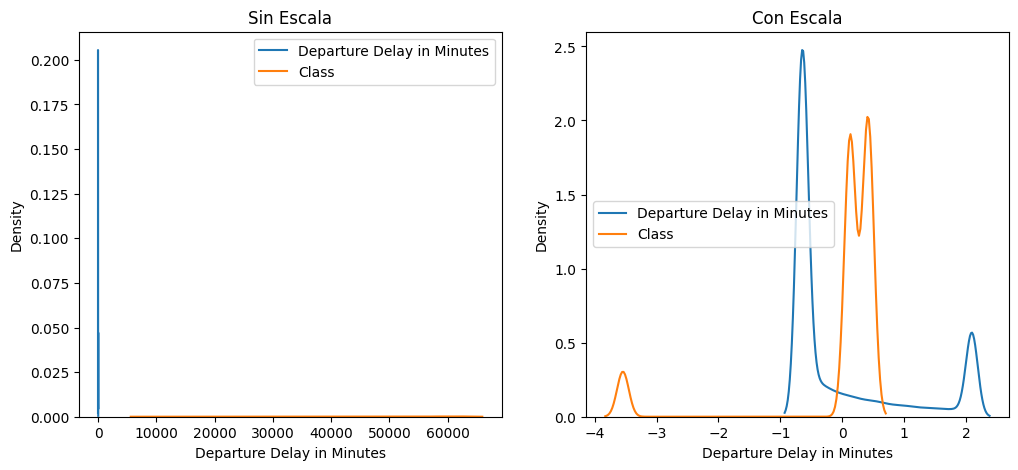

In [97]:
# Grafica para comparar la transformación de escala, 

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Sin Escala")
sns.kdeplot(dataset['Departure Delay in Minutes'],ax=ax1,label='Departure Delay in Minutes')
sns.kdeplot(dataset['Class'],ax=ax1,label='Class')

ax2.set_title("Con Escala")
sns.kdeplot(data_scaled['Departure Delay in Minutes'],ax=ax2,label='Departure Delay in Minutes')
sns.kdeplot(data_scaled['Class'],ax=ax2,label='Class')

ax1.legend()
ax2.legend()

plt.show()